**Problem statement** :Credit card companies should be to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.However, it is an extremely challenging task as there might be only 1000 fraud cases in over a million transactions, representing a meager 0.1% of the dataset, leading to highly imbalanced datasets. The ML algorithms are very likely to produce faulty classifiers when they are trained with imbalanced datasets as they tend to show a bias for the majority class, treating the minority class as a noise in the dataset. Also, due to the class imbalance "accuracy" is not a meaningful metric for unbalanced classification. The algorithm would be able to predict almost all cases belonging to the majority class which will yield a high accuracy score. However, the minority class would be totally ignored by the algorithm. The Accuracy Score would give a false sense of security to the credit card companies which can cost individuals and businesses lots of money.



**1.Importing Library**

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# importing numpy, pandas, matplotlib & seaborn (for advanced plots).
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns



# Importing lib for the ML algo.
import sklearn

# Scalers
from sklearn.preprocessing import StandardScaler

# Importing the Kmeans & related lib for finding the optimal k values
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing the Hierarchy for the linkage algo
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn import metrics
from sklearn import preprocessing

In [71]:
# to make graphs display inline
%matplotlib inline

# setting it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

# setting it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format

# setting it to display max of 50 columns
pd.set_option('display.max_columns', 50) 

# setting it to display max of 100 rows
pd.set_option('display.max_rows', 100) 

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

# setting styles for seaborn
sns.set(style="ticks", color_codes=True)

**2.Flie Path**

In [72]:
file_path ="/content/creditcard.csv"
credit = pd.read_csv(file_path)
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


**3.Reading the Data Set**

In [73]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [74]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [75]:
# calculating the row null % in the dataframe
print(round(100*credit.isnull().sum(axis=1)/len(credit), 2))

0        0.0000
1        0.0000
2        0.0000
3        0.0000
4        0.0000
          ...  
284802   0.0000
284803   0.0000
284804   0.0000
284805   0.0000
284806   0.0000
Length: 284807, dtype: float64


In [76]:
#checking if any columns having unique value ie only 1 value
unique =credit.nunique()
unique = unique[unique.values ==1] 
unique

Series([], dtype: int64)

**4.Exploratory Data Analysis**

**4.1.Univeriate Analysis**

{'boxes': [<matplotlib.lines.Line2D at 0x7fbf1faef0d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbf1fa34110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf1fa3c150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf1fa34bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbf1faef650>,
  <matplotlib.lines.Line2D at 0x7fbf1faefb90>]}

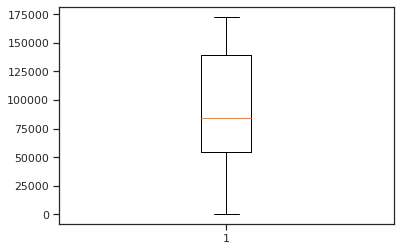

In [77]:
plt.boxplot(credit.Time)

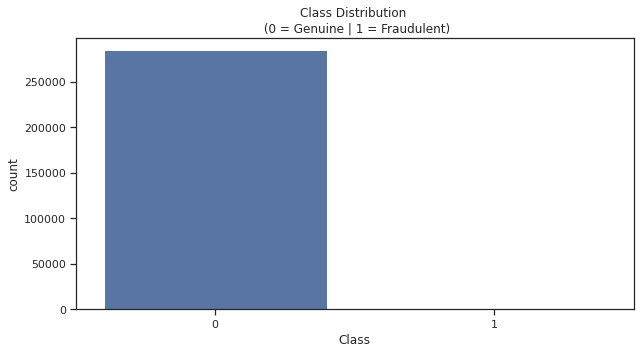

In [78]:

plt.figure(figsize=(10,5))
sns.countplot(x = 'Class', data = credit)
plt.title('Class Distribution \n (0 = Genuine | 1 = Fraudulent)');

**4.2 Bivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


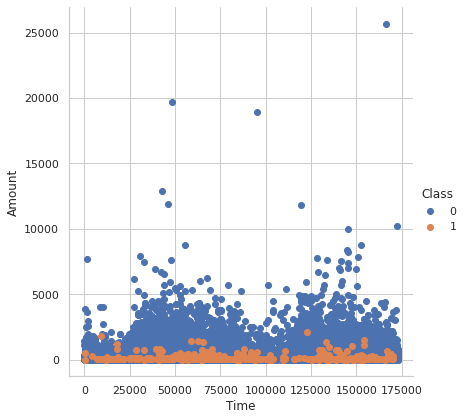

In [79]:
sns.set_style("whitegrid")
sns.FacetGrid(credit, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


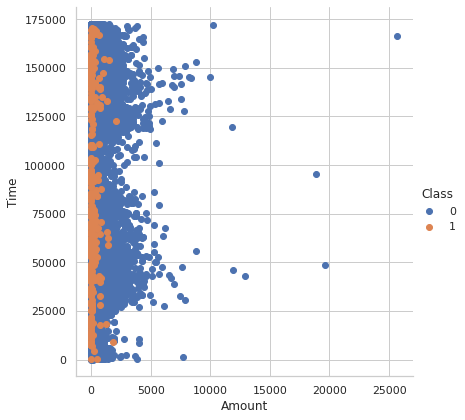

In [80]:
sns.set_style("whitegrid")
sns.FacetGrid(credit, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

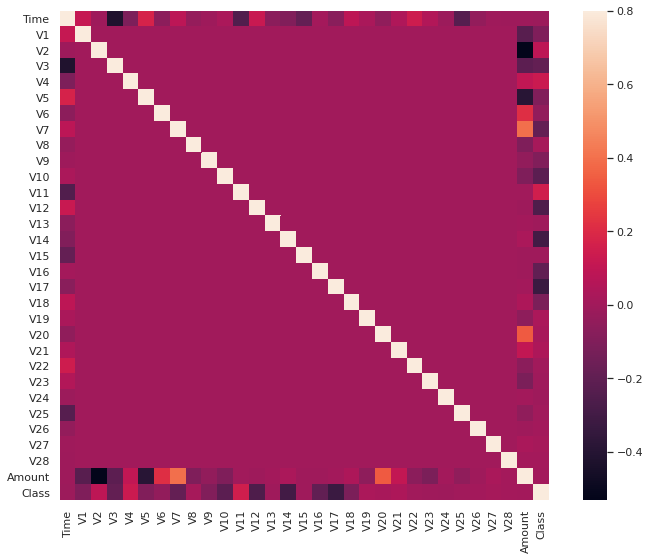

In [81]:
# Correlation matrix
corrmat = credit.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [82]:

x=credit.drop(['Class'],axis=1)
y=credit['Class']

In [83]:

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

**5.Splitting the data into train & test data**


In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**6.Logistic Regression**


In [85]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10, random_state=42,class_weight='balanced',max_iter=1000).fit(x_train, y_train)


In [86]:
predictions1=clf.predict(x_test)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.10      0.89      0.18       142

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.59     85443
weighted avg       1.00      0.99      0.99     85443



Confusion Matrix:  [[84147  1154]
 [   15   127]]


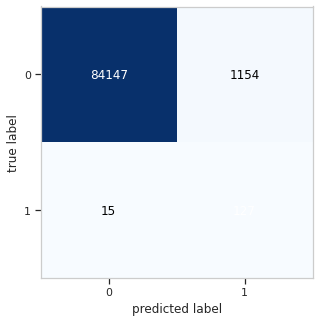

In [88]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predictions1)
print('Confusion Matrix: ',CM)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

This classifier achieves a satisfactory Recall score for the minority class. However, the Precision and F1 score for the minority class is abysmal which means this classifier labels "legal" transaction as "fraud" at a high rate which would anger the customers. Let's explore some more metrics to evaluate this classifier


In [89]:

y_score = clf.decision_function(x_test)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(x_test)
print('Average ROC_AUC score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred_prob[:,1])))

Average precision-recall score: 0.69
Average ROC_AUC score: 0.99


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.69')

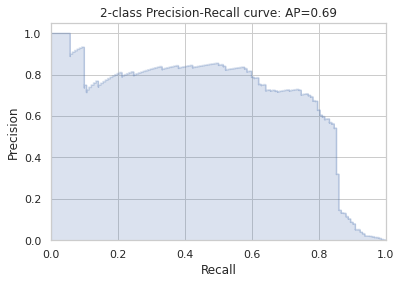

In [90]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

**7.Random Forest Classifier**

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=200)
rfc.fit(x_train,y_train)
predictions2=rfc.predict(x_test)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.94      0.74      0.83       142

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [93]:
from sklearn.metrics import roc_auc_score
y_pred_proba = rfc.predict_proba(x_test)
print('Average ROC_AUC score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred_proba[:,1])))

Average ROC_AUC score: 0.96


Confusion Matrix:  [[85294     7]
 [   37   105]]


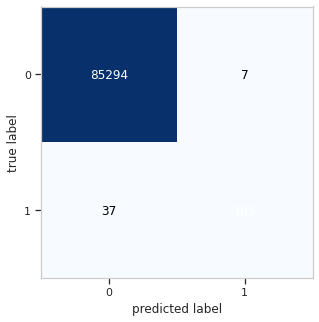

In [94]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predictions2)
print('Confusion Matrix: ',CM)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()


For this classifier, the Precision and F1 Score for the minority class is satisfactory. This classifier misclassifies "legal" transactions as "fraudulent" at a much lower rate compared to the Logistic Regression Classifier. However, the Recall is lower than the Logistic Regression Classifier which means that this classifier would not be able to predict frauds as well as the Logistic Regression Classifier



**8.Let's explore the imporatance of the features of the datase**

Feature ranking:


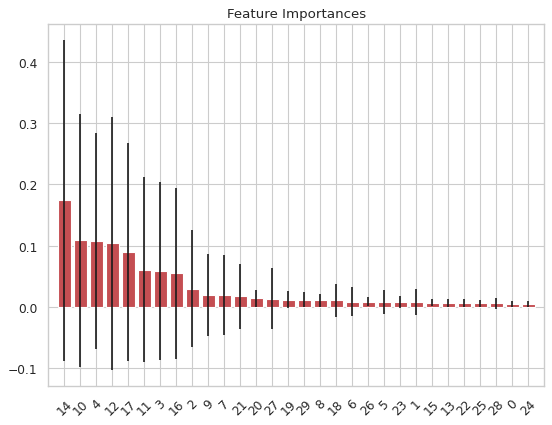

In [95]:
# Identifying the Feature Importance
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
X=x_train
#for f in range(X.shape[1]):
#print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices,rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

**9.XGBoost Classifier**


In [96]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

xgb = XGBClassifier(n_estimators=200,
                   objective= 'binary:logistic',
                   scale_pos_weight=1,
                   seed=42)
xgb.fit(x_train, y_train)
predictions3 = xgb.predict(x_test)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.94      0.80      0.86       142

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



Confusion Matrix:  [[85294     7]
 [   29   113]]


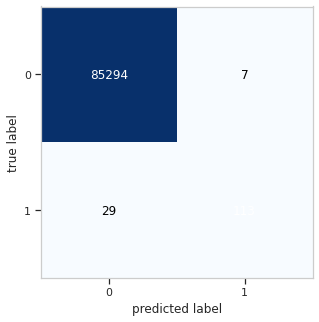

In [98]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predictions3)
print('Confusion Matrix: ',CM)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

This classifier has the best F1 Score among the classifiers. However, the Recall of this classifier is less than the Logistic Regression CV Classifier

In [99]:
xgb_prob=xgb.predict_proba(x_test) #Getting the Class Probabilities
y_score=[]
for i in range(len(xgb_prob)): #computing probability estimates of the positive class
  y_score.append(xgb_prob[i][1])

In [100]:

#y_score = xgb.decision_function(x_test)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import roc_auc_score
y_pred_prob = xgb.predict_proba(x_test)
print('Average ROC_AUC score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred_prob[:,1])))

Average precision-recall score: 0.86
Average ROC_AUC score: 0.99


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

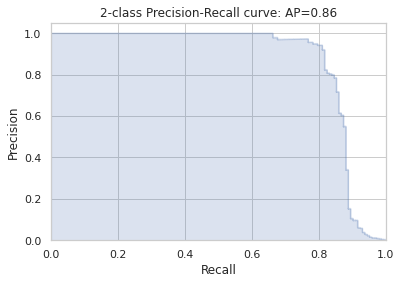

In [101]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))


The Average ROC_AUC score of XGBoost Classifier is same as the Logistic Regression Classifier and the Random Forest Classifier. However, the Average precision-recall score is significantly higher for the XGBoost Classifier compared to the Logistic Regression Classifier

**8.Synthetic Minority Over-sampling Technique(SMOTE)**

In [102]:
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
#smote = SMOTE('minority')
smote = SMOTE(random_state=42)

x_sm, y_sm = smote.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**9.Model Building with Balanced classes**

**9.1.Logistic Regression CV Classifier**

In [103]:
clf.fit(x_sm,y_sm)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=42, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [104]:
predictions4=clf.predict(x_test)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85301
           1       0.06      0.92      0.11       142

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



Confusion Matrix:  [[83097  2204]
 [   11   131]]


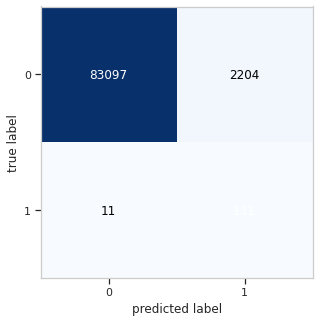

In [106]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predictions4)
print('Confusion Matrix: ',CM)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [107]:
y_score = clf.decision_function(x_test)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(x_test)
print('Average ROC_AUC score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred_prob[:,1])))

Average precision-recall score: 0.72
Average ROC_AUC score: 0.99


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.72')

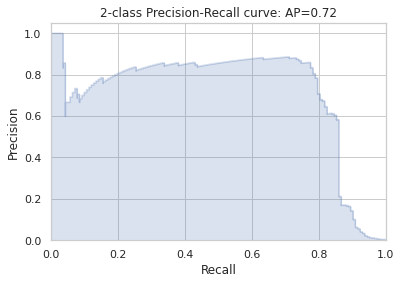

In [108]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Compared to the original Logistic Regression Model, the Recall for the minority class of the Logistic Regression Model trained using SMOTE improved at the cost of the Recall of the dominant class. Average precision-recall score marginally improves and the Average ROC_AUC score remains the same

**9.2.Random forest Classifier**

In [109]:

rfc.fit(x_sm,y_sm)
predictions5=rfc.predict(x_test)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.89      0.82      0.86       142

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



Confusion Matrix:  [[85287    14]
 [   25   117]]


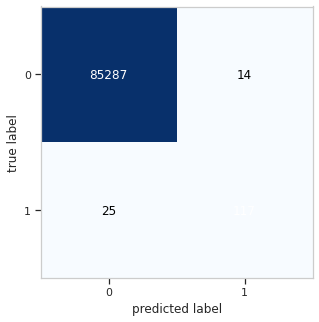

In [111]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predictions5)
print('Confusion Matrix: ',CM)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [112]:
from sklearn.metrics import roc_auc_score
y_pred_proba = rfc.predict_proba(x_test)
print('Average ROC_AUC score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred_proba[:,1])))

Average ROC_AUC score: 0.97


Compared to the original Random Forest Classifier, the Recall of the minority class improved by using SMOTE at the cost of Precision. Furthermore, there is a slight decrease in the Average ROC_AUC score

**9.3.XCGBoost classifier**

In [113]:

xgb.fit(x_sm, y_sm)
predictions6 = xgb.predict(x_test)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions6))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.20      0.89      0.32       142

    accuracy                           0.99     85443
   macro avg       0.60      0.94      0.66     85443
weighted avg       1.00      0.99      1.00     85443



Confusion Matrix:  [[84782   519]
 [   16   126]]


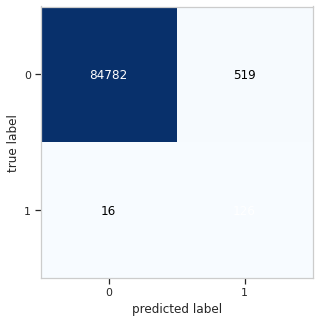

In [115]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predictions6)
print('Confusion Matrix: ',CM)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

Compared to the original XGBoost Model, using SMOTE improves the Recall of the minority class. However, both Precision and F1 Score show a sharp decrease.

Our last model, XGBoost, had a False Negative Rate of 16%, which was the lowest of the four models we evaluated. Interestingly, the model achieved this lowest False Negative Rate while maintaining a True Negative Rate of 84%, which is good. This model, therefore, appears to be the most effective, as it finds an excellent balance between precision and recall